In [11]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [4]:
train_path = "C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/train/"
if not os.path.exists(train_path):
  os.makedirs(train_path)

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
  path_audio = os.path.join('C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/train/',f'{g}')
  if not os.path.exists(path_audio):
    os.makedirs(path_audio)
  path_train = os.path.join('C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/train/',f'{g}')
  if not os.path.exists(path_train):
    os. makedirs(path_train)



In [5]:
from pydub import AudioSegment
i = 0
for g in genres:
  j=0
  for filename in os.listdir(os.path.join('C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/Data/genres_original',f"{g}")):

    song  =  os.path.join(f'C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/Data/genres_original/{g}',f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      #print(i)
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/train/{g}/{g+str(j)+str(w)}.wav', format="wav")


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [9]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

file = open('C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/audioFeatures3sec.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/train/{g}'):
        songname = f'C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/train/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=3)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/audioFeatures3sec.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

data = pd.read_csv('C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/audioFeatures3sec.csv')


In [4]:
data = pd.read_csv('C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/audioFeatures3sec.csv')

In [5]:
df = pd.DataFrame(data)

In [6]:
df.shape

(9990, 28)

In [13]:
df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.379990,0.130072,2202.369980,2244.896920,4572.537006,0.102639,-145.565070,100.830573,-9.933303,37.139589,...,-6.479726,4.905874,-5.168791,2.136233,-4.168029,1.427954,-4.192179,0.724030,-2.497078,-0.928750
std,0.090608,0.068164,750.391602,541.333433,1639.176667,0.045643,106.350973,34.516520,23.908420,17.756879,...,7.800288,7.545624,7.116573,6.073986,5.914697,5.725414,5.667050,5.173894,5.105615,5.245859
min,0.108073,0.000947,479.905804,499.577101,673.906438,0.013525,-661.934631,-12.043992,-103.846031,-35.187378,...,-40.048431,-23.837898,-29.278126,-23.431784,-30.366192,-26.764160,-27.932220,-20.749746,-27.359076,-35.614895
25%,0.316090,0.083282,1634.440203,1890.759725,3390.961867,0.067385,-201.456421,76.026962,-26.778301,24.414702,...,-12.180371,-0.438330,-10.311506,-1.892192,-8.168509,-2.233532,-7.944616,-2.521760,-5.734799,-4.012597
50%,0.385192,0.120503,2213.635012,2233.838250,4636.264273,0.097972,-120.258919,98.486618,-11.499140,37.758715,...,-6.290264,4.674653,-4.797738,2.205503,-4.149452,1.444074,-4.443325,0.728384,-2.699554,-1.044268
75%,0.442904,0.175398,2714.394795,2591.195841,5597.970252,0.132817,-70.121988,122.082535,5.983306,49.728618,...,-0.801575,10.637307,-0.152474,6.213855,-0.213016,5.103709,-0.732971,3.869063,0.521311,2.193336
max,0.751176,0.440458,5432.278846,3708.279662,9486.121357,0.347705,107.516045,249.630051,80.177567,89.275070,...,46.677635,51.002953,36.090897,34.572025,27.987846,39.147713,33.869507,36.923038,31.367567,34.130856


In [32]:
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues10.wav,0.335555,0.130189,1773.358004,1972.334258,3714.063439,0.081851,-119.018044,125.080345,-23.394333,...,10.168980,-4.672668,8.364334,-7.225304,-2.881668,-3.230046,0.696385,-5.035945,-0.239585,blues
1,blues100.wav,0.265217,0.100493,1998.758310,2000.772635,4272.850060,0.089660,-191.297531,110.314560,-16.999125,...,5.785739,-4.663638,-8.735687,-1.610614,-2.937784,-4.475559,-0.809349,1.838367,-12.372054,blues
2,blues1000.wav,0.430437,0.056540,1193.435936,1728.975448,2797.742826,0.039401,-253.811722,142.288467,-3.833815,...,3.263165,-18.889250,-2.306869,-11.410310,-3.753128,-6.379741,-2.335501,-8.247754,-13.835650,blues
3,blues1001.wav,0.401023,0.120740,1552.012695,1789.033520,3343.029785,0.067338,-169.650101,128.738098,-19.104671,...,4.258239,-11.856021,3.331232,-1.516374,2.776776,-6.178742,-5.594201,-7.200738,-5.016602,blues
4,blues1002.wav,0.348045,0.132596,1515.561237,1448.285471,2762.792781,0.089821,-139.112396,151.453964,-58.910511,...,8.456491,-9.905529,-6.358871,-6.737503,-0.994481,-7.076486,-8.915052,-5.618775,5.270431,blues


In [14]:
df.skew(axis = 0, skipna = True,numeric_only= True)

chroma_stft          -0.020812
rmse                  0.499697
spectral_centroid     0.271331
spectral_bandwidth    0.064335
rolloff               0.100522
zero_crossing_rate    0.650963
mfcc1                -1.113245
mfcc2                 0.401007
mfcc3                 0.251064
mfcc4                -0.054223
mfcc5                -0.098731
mfcc6                -0.163521
mfcc7                 0.039066
mfcc8                -0.107117
mfcc9                 0.039885
mfcc10               -0.079725
mfcc11               -0.062936
mfcc12               -0.047030
mfcc13               -0.000585
mfcc14               -0.026588
mfcc15                0.156243
mfcc16               -0.003271
mfcc17                0.451785
mfcc18                0.263489
mfcc19                0.390769
mfcc20                0.060041
dtype: float64

array([[<AxesSubplot: title={'center': 'mfcc20'}>]], dtype=object)

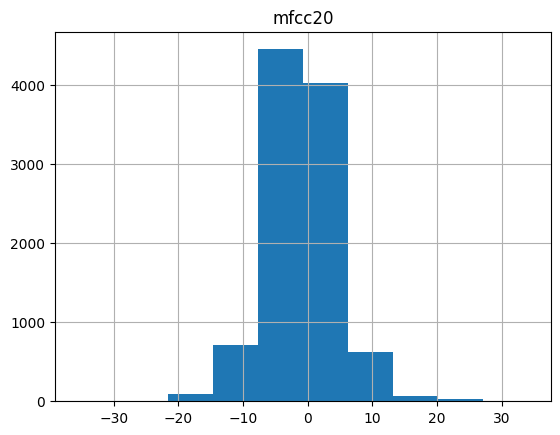

In [25]:
df.hist(column='mfcc20')

array([[<AxesSubplot: title={'center': 'zero_crossing_rate'}>]],
      dtype=object)

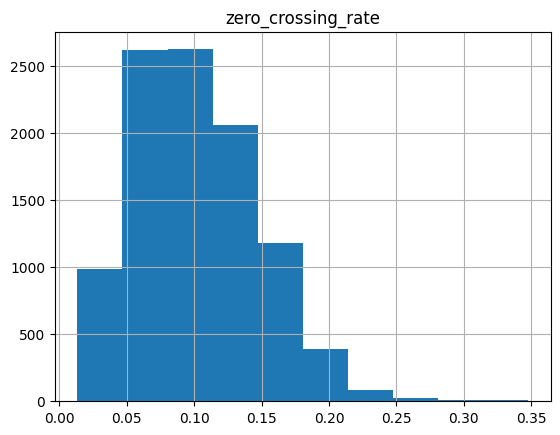

In [8]:
df.hist(column='zero_crossing_rate')

array([[<AxesSubplot: title={'center': 'rolloff'}>]], dtype=object)

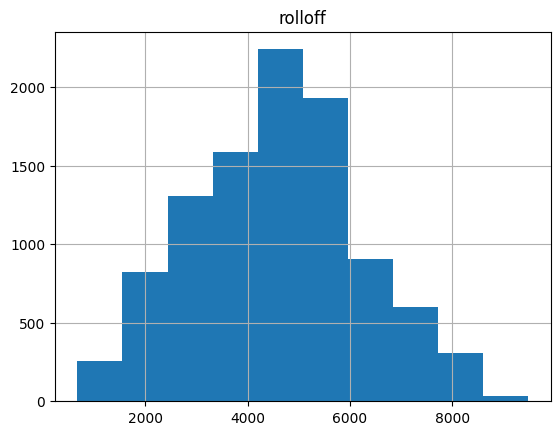

In [9]:
df.hist(column='rolloff')

array([[<AxesSubplot: title={'center': 'chroma_stft'}>]], dtype=object)

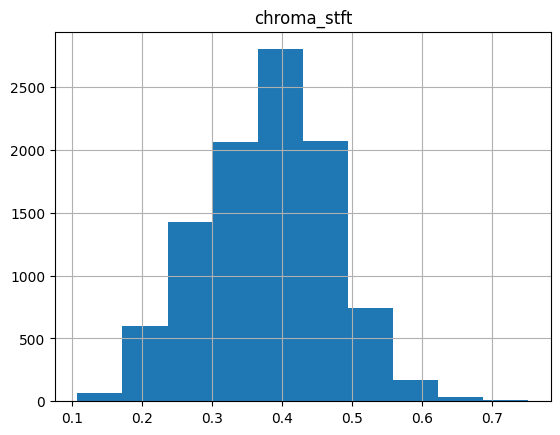

In [7]:
df.hist(column='chroma_stft')

<BarContainer object of 9990 artists>

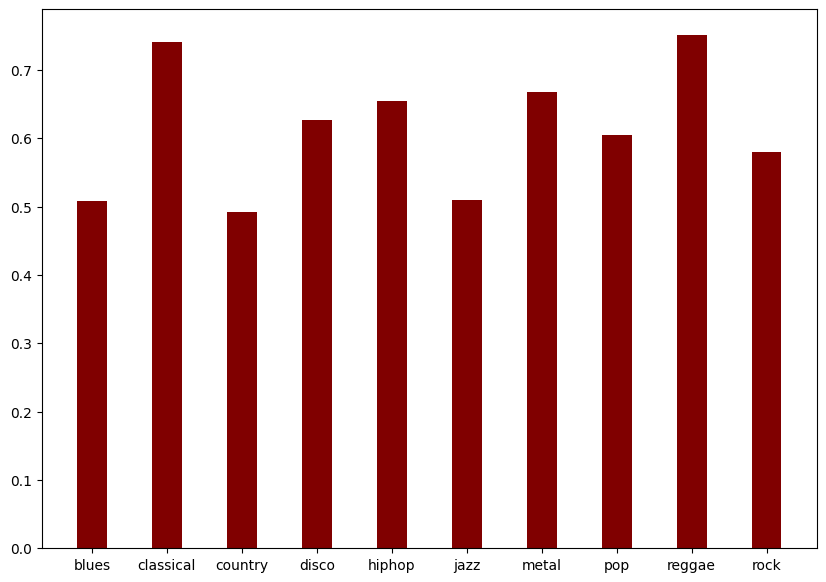

In [36]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['label'], df['chroma_stft'], color ='maroon',
        width = 0.4)

<BarContainer object of 9990 artists>

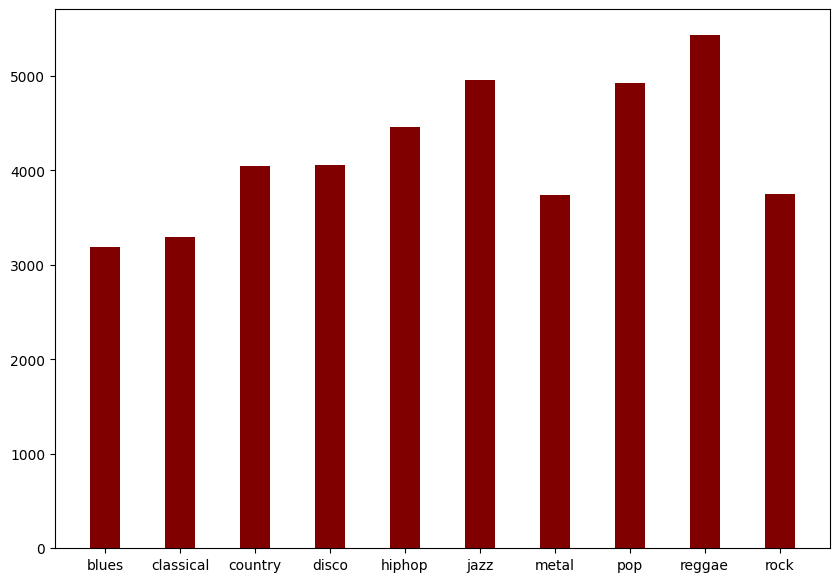

In [45]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['label'], df['spectral_centroid'], color ='maroon',
        width = 0.4)

<BarContainer object of 9990 artists>

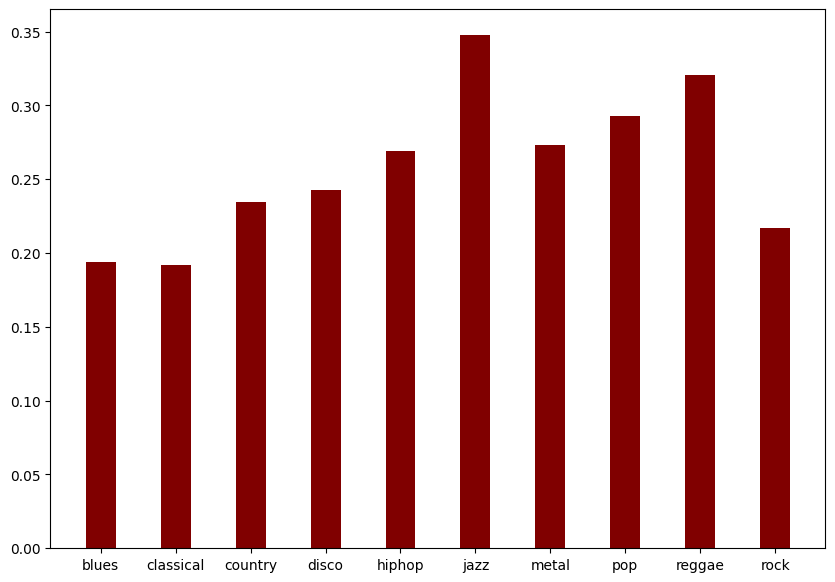

In [46]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['label'], df['zero_crossing_rate'], color ='maroon',
        width = 0.4)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23436\2615245604.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr())


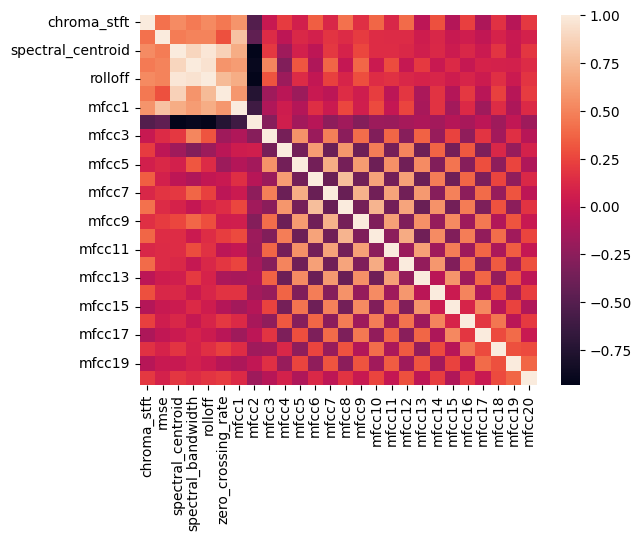

In [49]:
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr())

In [64]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:/Users/lenovo/Downloads/COMP541 - Data Mining -  Assignments/archive/audioFeatures.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8878
2220
8878
2220


In [33]:
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

Classification Using SVM

In [8]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C= 10).fit(X_train,y_train)
clf.score(X_test, y_test)

0.6599099099099099

Classification Using KNN

In [34]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8414414414414414

In [12]:
from keras.models import Sequential

In [13]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer,
                loss = 'sparse_categorical_crossentropy',
                metrics = 'accuracy'
                )
    return model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

In [14]:
def plotValidate(history):
    print("Accuracy of validation::",max(history.history['val_accuracy']))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [15]:
model = keras.models.Sequential([
    keras.layers.Dense(512,activation = 'relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10,activation = 'softmax')

])
print(model.summary())
model_history = trainModel(model=model,epochs = 600, optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [16]:
results  = model.evaluate(X_test,y_test,batch_size=128)
print("test loss:", results)

18/18 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.9324
test loss: [0.3973378837108612, 0.9324324131011963]


<AxesSubplot: >

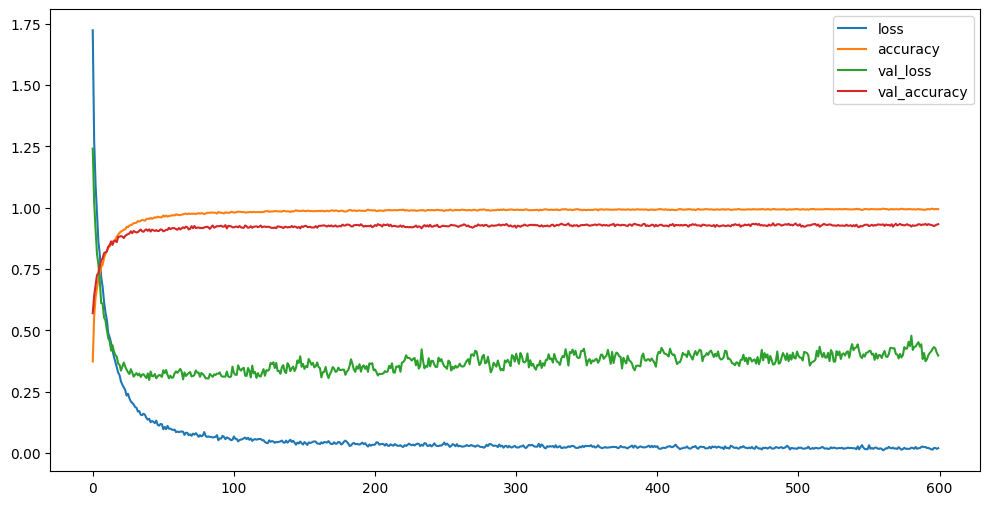

In [40]:
pd.DataFrame(model_history.history).plot(figsize=(12,6))